In [63]:
%matplotlib inline
import cv2
import numpy as np
from skimage import io
from skimage import feature
from skimage import color
from matplotlib import pyplot as plt
import matplotlib.cbook 
import os
from mpl_toolkits.mplot3d import axes3d, Axes3D

In [64]:
import cv2
import numpy as np
from skimage import io
from skimage import feature
from skimage import color
from matplotlib import pyplot as plt
import matplotlib.cbook 
import os

def houghlines(image, grid_step, accuracy, threshold):    
    edges = get_edges(cv2.cvtColor(image, cv2.COLOR_RGB2GRAY))
    matrix = get_phase_space_matrix(edges, grid_step, accuracy)
    get_lines(np.copy(image), matrix, threshold * np.max(matrix))
    return matrix

def get_edges(image):
    edges = cv2.Canny(image, 100, 200)
    plt.figure() 
    plt.imshow(edges, cmap = 'gray')
    return edges

def get_phase_space_matrix(edges, grid_step, accuracy):
    R_max=int((edges.shape[0]**2 +edges.shape[1]**2)**0.5)
    f_max=360
    R_points_number = int(2 * accuracy/grid_step)
    f_points_number = int(f_max/grid_step)
    shape = (R_max, f_max)
    matrix = np.zeros(shape)
    for x in xrange(edges.shape[0]):
        for y in xrange(edges.shape[1]):
            if edges[x][y] != 0:
                #print x, y
                for f in np.linspace(0, shape[1]-1, f_points_number):
                    angle = (np.pi*f)/180. 
                    r = abs(y*np.sin(angle)+x*np.cos(angle))
                    f_index = int(f)
                    for R in np.linspace(r-accuracy, r+accuracy, 5):
                        r_index = int(R)
                        if matrix[r_index][f_index]==0:
                            matrix[r_index][f_index]=100
                        matrix[r_index][f_index]=matrix[r_index][f_index]+1
    #matrix =  (matrix / (np.max(matrix))) * 255
    plt.figure(figsize=(15, 8)) 
    plt.imshow(matrix, cmap='gray') 
    return matrix

def get_lines(image, matrix, tres):
    R_max=int((image.shape[0]**2 +image.shape[1]**2)**0.5)
    lines_params = []
    for R in xrange(matrix.shape[0]):
        for f in xrange(matrix.shape[1]):
            if matrix[R][f] > tres:
                lines_params.append((R,f))
                
    for R, f in lines_params:
        x0 = 0
        x1 = 1000
        angle = (np.pi * f)/180
        if np.sin(angle) != 0:
            y0 = int((R - x0*np.cos(angle)) / np.sin(angle))
            y1 = int((R - x1*np.cos(angle)) / np.sin(angle))
            cv2.line(image, (y0, x0), (y1, x1), (255, 0, 0), 2)
   
    plt.figure() 
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

def get_cv2_lines(image, treshold):
    edges = cv2.Canny(cv2.cvtColor(image, cv2.COLOR_RGB2GRAY), 30, 40)
    lines = cv2.HoughLines(edges, 0.5, np.pi/180, treshold)
    for param in lines[0]:
        R = param[0]
        f = param[1]
        x0 = 0
        x1 = 1000
        angle = (np.pi * f)/180
        if np.sin(angle) != 0:
            y0 = int((R - x0*np.cos(f)) / np.sin(f))
            y1 = int((R - x1*np.cos(f)) / np.sin(f))
            cv2.line(image,(x1,y1),(x0,y0),(255,0,0),2)
    
    plt.figure() 
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

def task_1(image_name, step, accuracy, threshold_1, treshold_2):
    image = cv2.imread(image_name)
    houghlines(image, step, accuracy, threshold_1)
    get_cv2_lines(image, treshold_2)
    plt.show()


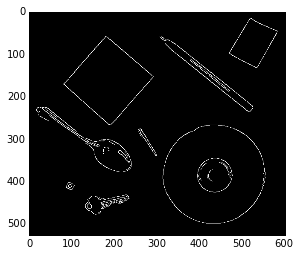

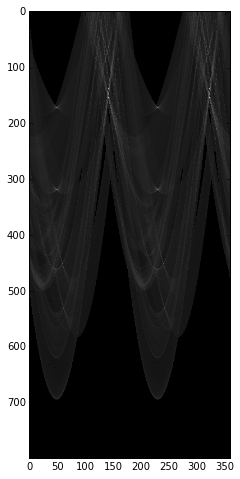

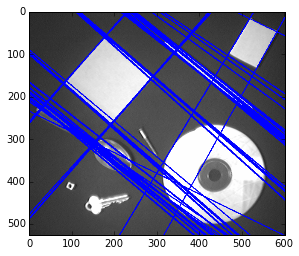

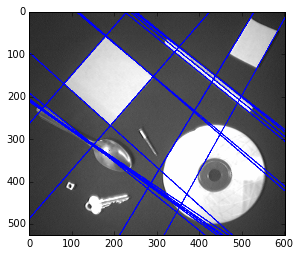

In [43]:
task_1('line1.png', 1, 0.005, 0.45, 50)

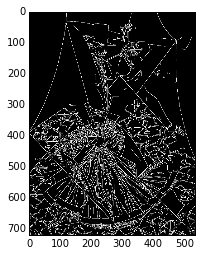

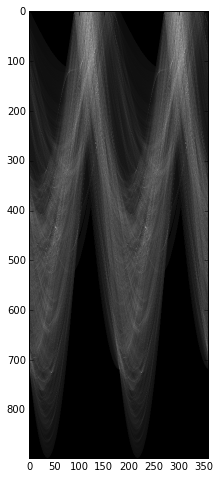

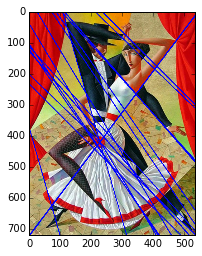

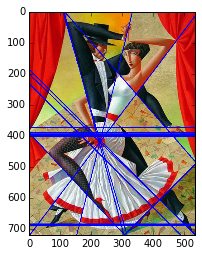

In [60]:
task_1('line2.png', 1, 0.5, 0.7, 120)

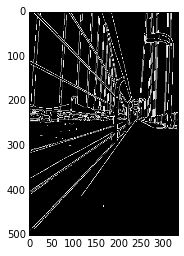

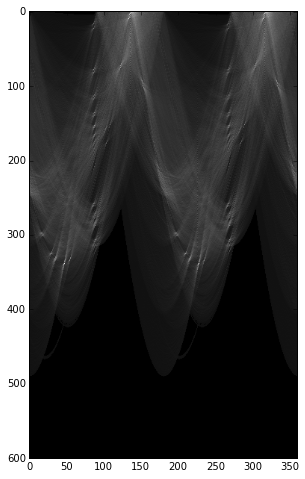

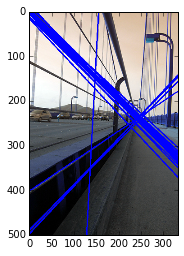

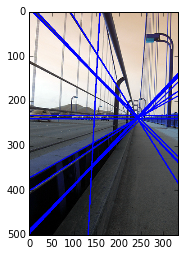

In [47]:
task_1('line3.png', 1, 0.002, 0.65, 100)

In [79]:
def houghcircles(image, grid_step, accuracy, treshold):
    edges = get_edges(cv2.cvtColor(image, cv2.COLOR_RGB2GRAY))
    matrix = get_phase_space_matrix(edges, grid_step, accuracy)
    get_circles(image, matrix, treshold * np.max(matrix))
    visualize_matrix(matrix)
    
def get_phase_space_matrix(edges, grid_step, accuracy):
    R_max=max(edges.shape[0], edges.shape[1])
    a_max=edges.shape[0]
    b_max=edges.shape[1]
    R_points_number = int(2*accuracy/5)
    a_points_number = int(a_max/grid_step)
    b_points_number = int(b_max/grid_step)
    shape = (a_max, b_max, R_max)
    matrix = np.zeros(shape)
    for x in range(edges.shape[0]):
        for y in range(edges.shape[1]):
            if edges[x][y] != 0:
                for a in np.linspace(0, shape[0]-1, a_points_number):
                    for b in np.linspace(0, shape[1]-1, b_points_number):
                        r = (x-a)**2+(y-b)**2
                        a_index = int(a)
                        b_index = int(b)
                        for R in np.linspace(r-accuracy, r+accuracy, 5):
                            r_index = int(abs(R)**0.5)
                            if r_index < shape[2]:
                                matrix[a_index][b_index][r_index]=matrix[a_index][b_index][r_index]+1
    return matrix

def visualize_matrix(matrix):
    x=[]
    y=[]
    z=[]
    v=[]
    for i, t in enumerate(matrix):
        for j, r in enumerate(t):
            for k, val in enumerate(r):
                if val !=0:
                    x.append(i)
                    y.append(j)
                    z.append(k)
                    v.append(val)
    
    fig = plt.figure()
    
    ax = Axes3D(fig)
    ax.scatter(x, y, z, c=v, marker='o')
    plt.show()
                
def get_circles(image, matrix, tres):
    circles = []
    for a in xrange(matrix.shape[0]):
        for b in xrange(matrix.shape[1]):
            for R in xrange(matrix.shape[2]):
                if (matrix[a][b][R] > tres):
                    circles.append((a, b, R))
                
    for a, b, R in circles:
        cv2.circle(image, (b, a), R, (0, 0, 255), 1)
   
    plt.figure() 
    plt.imshow(image)

def get_cv2_circle(image, treshold):
    edges = cv2.Canny(cv2.cvtColor(image, cv2.COLOR_RGB2GRAY), 100, 200)
    circles = cv2.HoughCircles(edges, cv2.cv.CV_HOUGH_GRADIENT, 1.5, treshold)
    if circles:
        circles = np.round(circles[0, :]).astype("int")
        for a, b, R in circles:
            cv2.circle(image, (b, a), R, (255, 0, 255), 2)
    plt.figure() 
    plt.imshow(image)
    
def task_2(image_name, step, accuracy, treshold_1, treshold_2):
    image = cv2.imread(image_name)
    image_2 = np.copy(image)
    houghcircles(image, step, accuracy, treshold_1)
    get_cv2_circle(np.copy(image_2), treshold_2)
    plt.show()


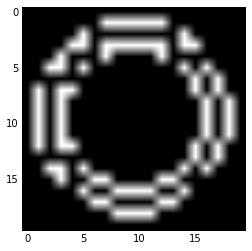

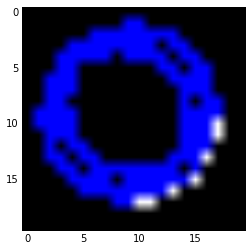

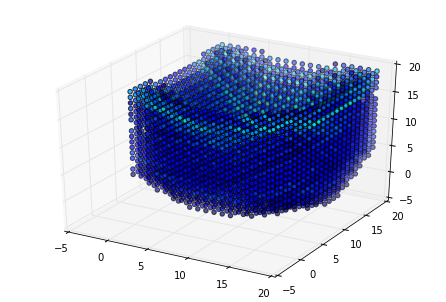

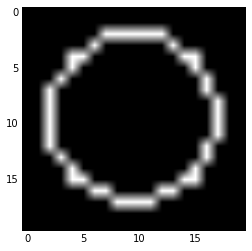

In [80]:
task_2('circle.png', 1, 0.5, 0.8, 80)

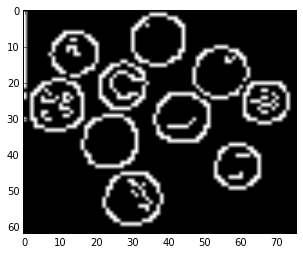

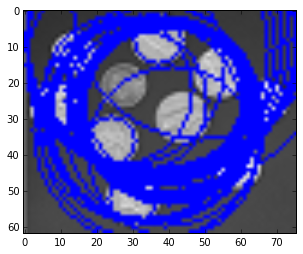

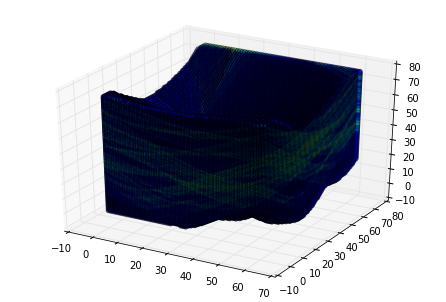

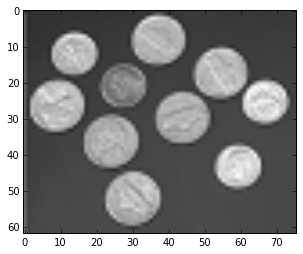

In [81]:
task_2('circle_1.png', 1, 0.001, 0.8, 80)

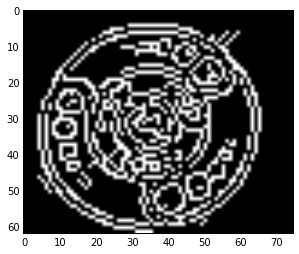

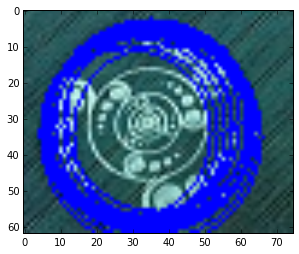

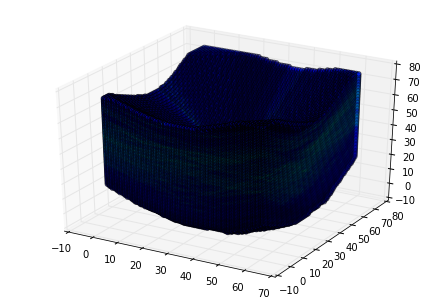

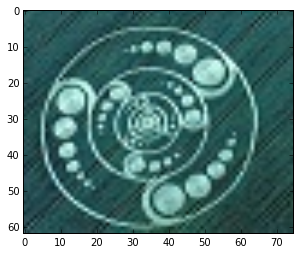

In [83]:
task_2('circle_3.jpg', 1, 0.0005, 0.6, 80)

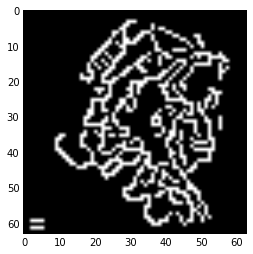

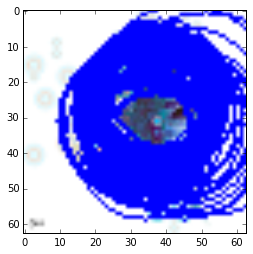

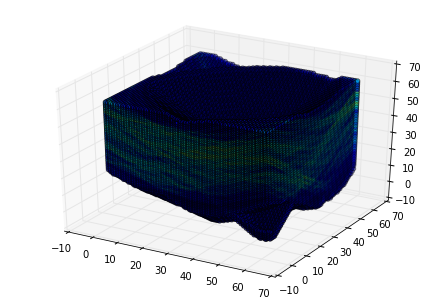

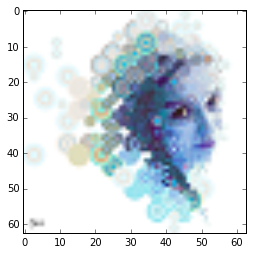

In [87]:
task_2('circle_2.png', 1, 0.0005, 0.8, 80)